<a href="https://colab.research.google.com/github/Shadowpii/MAGIC_Telescope_Dataset/blob/main/MAGIC_Gamma_Telescope_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# **Dataset**:
UCI Machine Learning Repository [https://archive.ics.uci.edu/ml]

## Original Owner:
R. K. Bock
Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)

## Donor
P. Savicky
Institute of Computer Science, AS of CR
Czech Republic

In [2]:
cols = ["fLength", "fWidth", "fSize", " fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"] = (df["class"] == "g").astype(int)

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


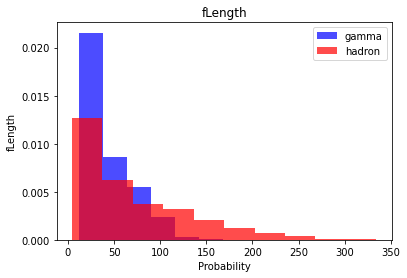

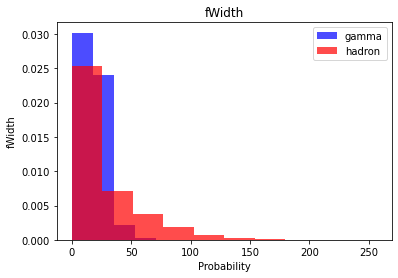

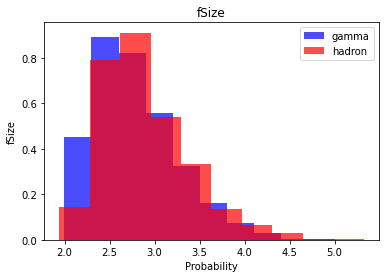

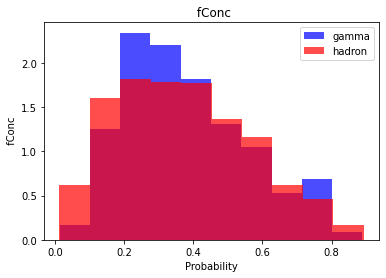

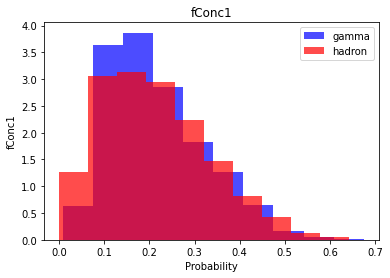

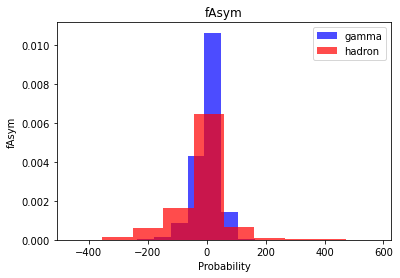

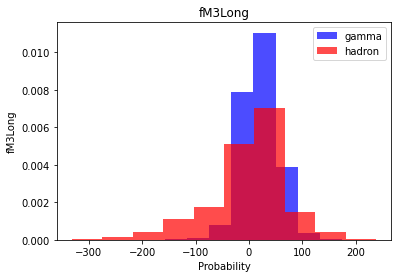

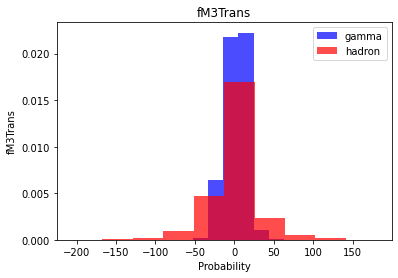

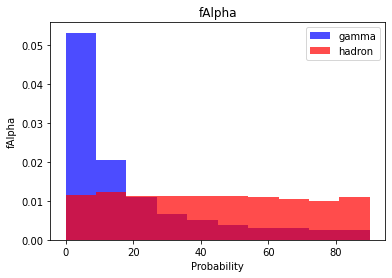

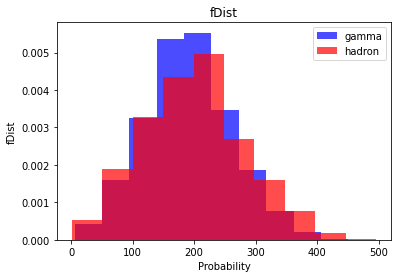

In [5]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.xlabel('Probability')
  plt.ylabel(label)
  plt.legend()
  plt.show()

# Train, Validation and Test datasets

In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

In [7]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  Y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X,Y = ros.fit_resample(X,Y)

  data = np.hstack((X, np.reshape(Y, (-1,1))))

  return data, X, Y

In [8]:
train, X_train, Y_train = scale_dataset(train, oversample=True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample=False)
test, X_test, Y_test = scale_dataset(test, oversample=False)

# K-nearest Neighbour

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [11]:
Y_pred = knn_model.predict(X_test)

In [12]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1302
           1       0.86      0.86      0.86      2502

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, Y_train)

In [15]:
Y_pred = nb_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.40      0.50      1302
           1       0.74      0.89      0.81      2502

    accuracy                           0.73      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.73      0.70      3804



# Logistic Regresion

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, Y_train)

In [18]:
Y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      1302
           1       0.85      0.82      0.84      2502

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.80      0.79      0.79      3804



# Support Vector Machine

In [19]:
from sklearn.svm import SVC

In [20]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train)

In [21]:
Y_pred = svm_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1302
           1       0.90      0.89      0.89      2502

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# NEURAL NETWORKS

In [22]:
import tensorflow as tf

In [23]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [24]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


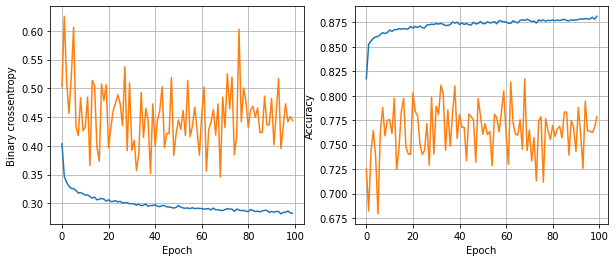

119/119 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.8651
16 nodes, dropout 0, lr 0.01, batch size 64


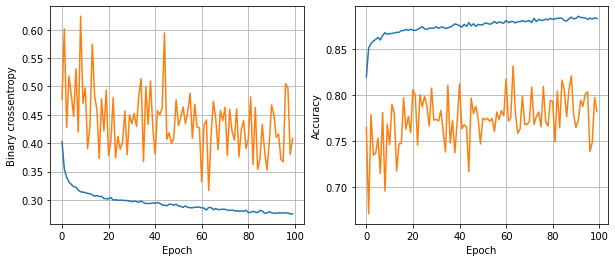

119/119 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8717
16 nodes, dropout 0, lr 0.01, batch size 128


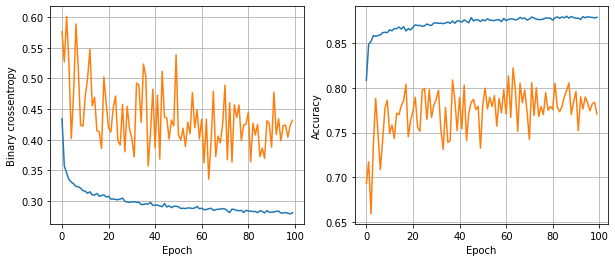

119/119 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8749
16 nodes, dropout 0, lr 0.005, batch size 32


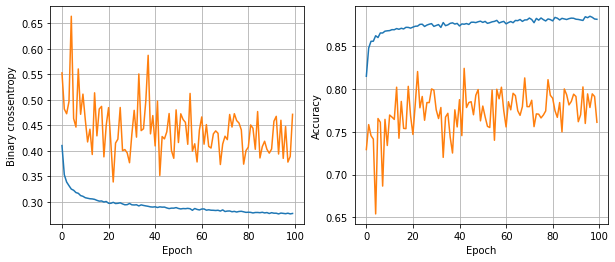

119/119 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8680
16 nodes, dropout 0, lr 0.005, batch size 64


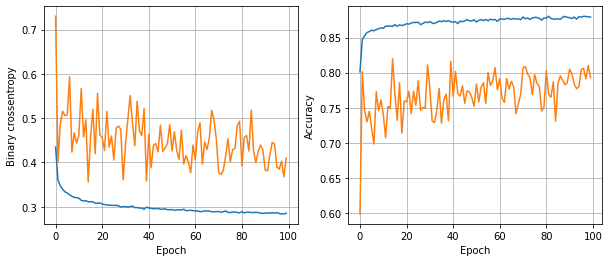

119/119 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8628
16 nodes, dropout 0, lr 0.005, batch size 128


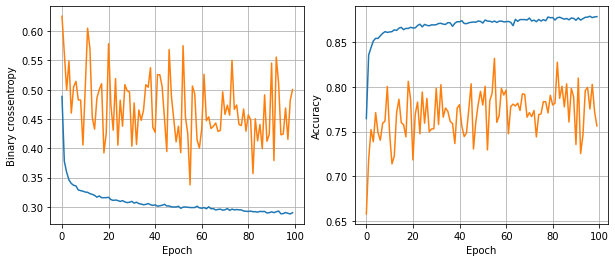

119/119 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8699
16 nodes, dropout 0, lr 0.001, batch size 32


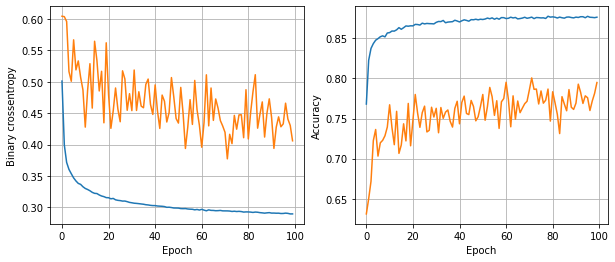

119/119 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8696
16 nodes, dropout 0, lr 0.001, batch size 64


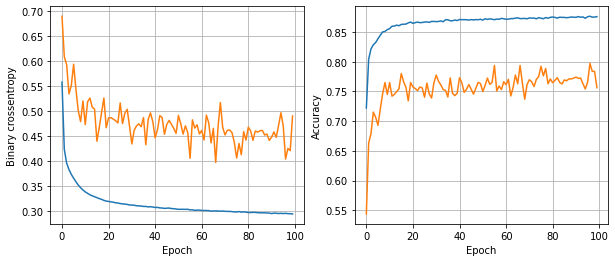

119/119 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8683
16 nodes, dropout 0, lr 0.001, batch size 128


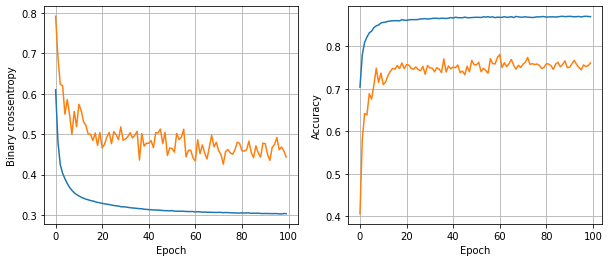

119/119 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.8725
16 nodes, dropout 0.2, lr 0.01, batch size 32


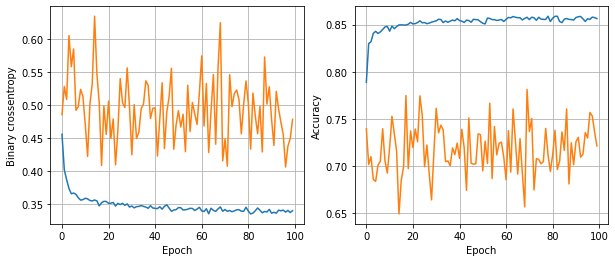

119/119 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8704
16 nodes, dropout 0.2, lr 0.01, batch size 64


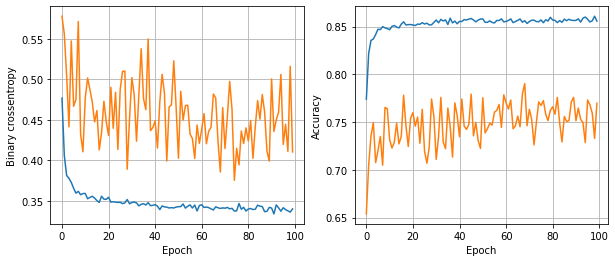

119/119 [==============================] - 0s 3ms/step - loss: 0.3358 - accuracy: 0.8651
16 nodes, dropout 0.2, lr 0.01, batch size 128


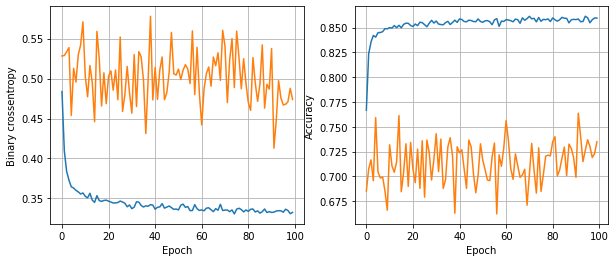

119/119 [==============================] - 0s 3ms/step - loss: 0.3207 - accuracy: 0.8683
16 nodes, dropout 0.2, lr 0.005, batch size 32


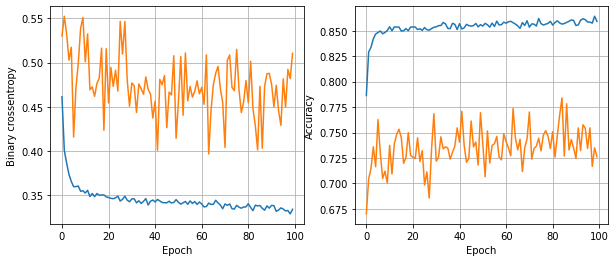

119/119 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8699
16 nodes, dropout 0.2, lr 0.005, batch size 64


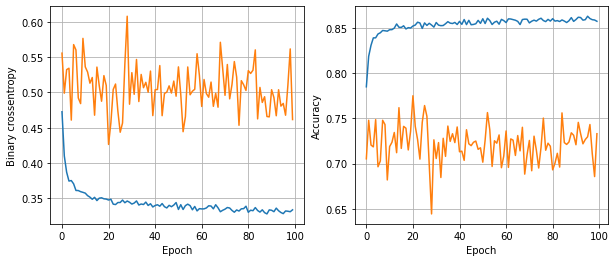

119/119 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8691
16 nodes, dropout 0.2, lr 0.005, batch size 128


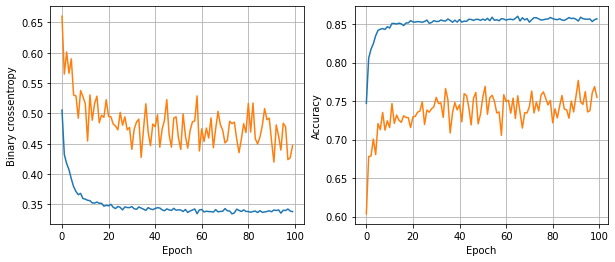

119/119 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8667
16 nodes, dropout 0.2, lr 0.001, batch size 32


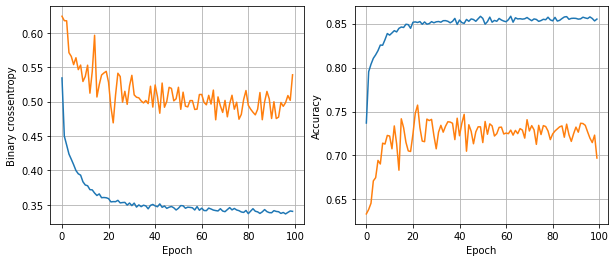

119/119 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8691
16 nodes, dropout 0.2, lr 0.001, batch size 64


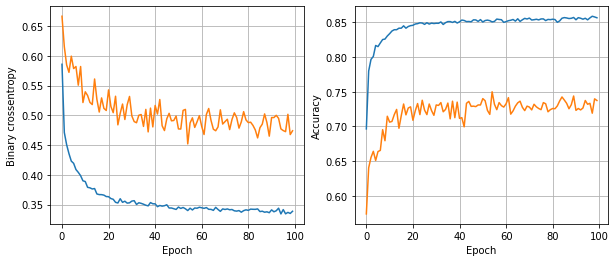

119/119 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8646
16 nodes, dropout 0.2, lr 0.001, batch size 128


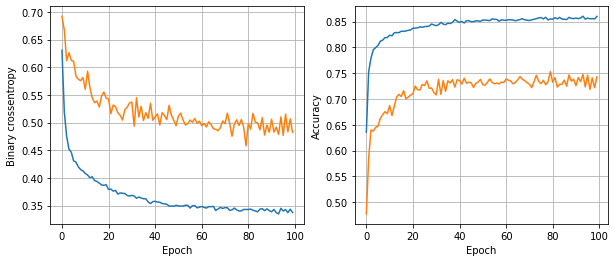

119/119 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8680
32 nodes, dropout 0, lr 0.01, batch size 32


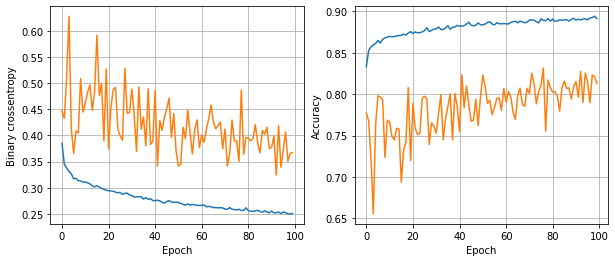

119/119 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8620
32 nodes, dropout 0, lr 0.01, batch size 64


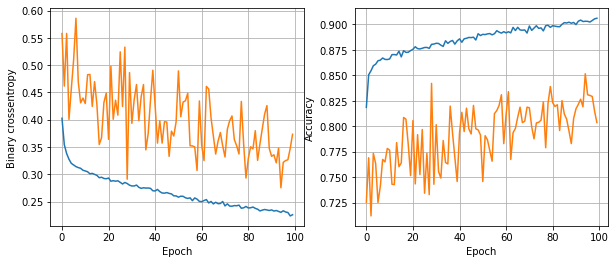

119/119 [==============================] - 1s 4ms/step - loss: 0.3971 - accuracy: 0.8578
32 nodes, dropout 0, lr 0.01, batch size 128


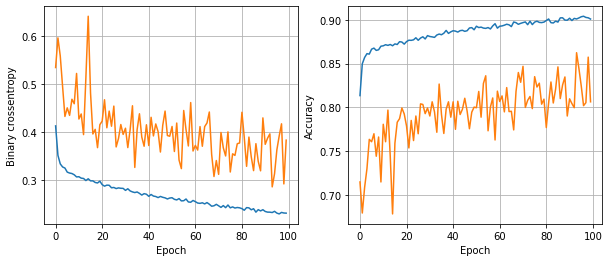

119/119 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.8607
32 nodes, dropout 0, lr 0.005, batch size 32


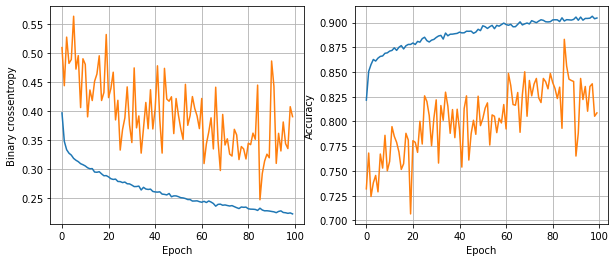

119/119 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8623
32 nodes, dropout 0, lr 0.005, batch size 64


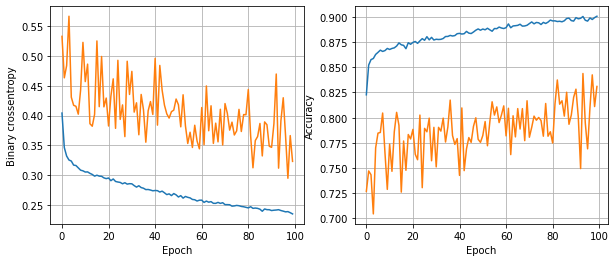

119/119 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8567
32 nodes, dropout 0, lr 0.005, batch size 128


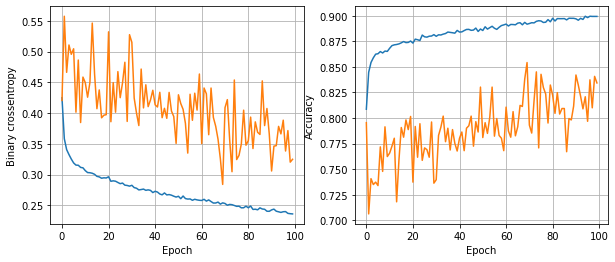

119/119 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8688
32 nodes, dropout 0, lr 0.001, batch size 32


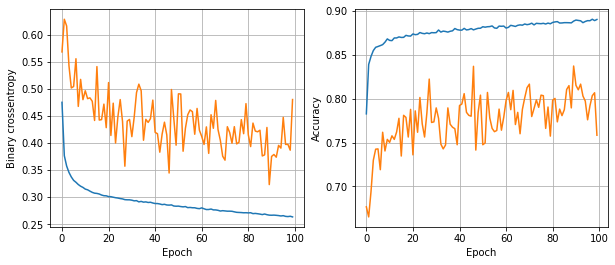

119/119 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8720
32 nodes, dropout 0, lr 0.001, batch size 64


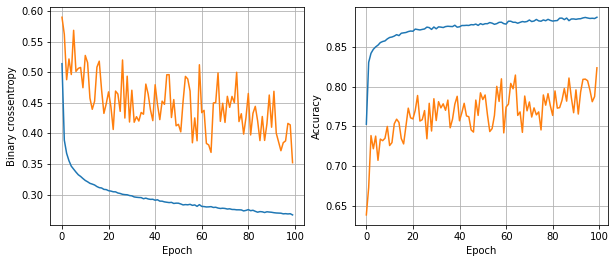

119/119 [==============================] - 0s 3ms/step - loss: 0.3294 - accuracy: 0.8623
32 nodes, dropout 0, lr 0.001, batch size 128


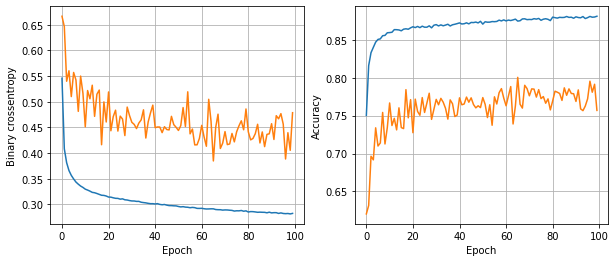

119/119 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.8743
32 nodes, dropout 0.2, lr 0.01, batch size 32


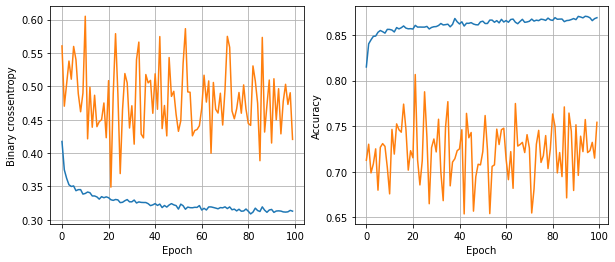

119/119 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8733
32 nodes, dropout 0.2, lr 0.01, batch size 64


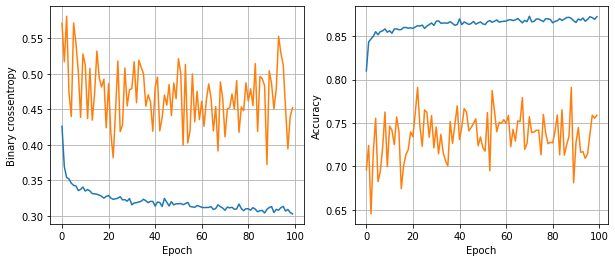

119/119 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8736
32 nodes, dropout 0.2, lr 0.01, batch size 128


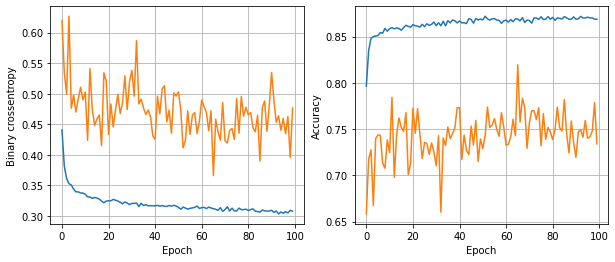

119/119 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.8675
32 nodes, dropout 0.2, lr 0.005, batch size 32


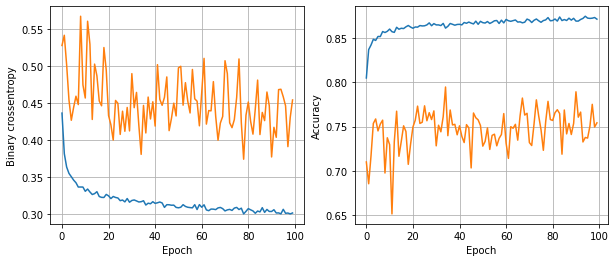

119/119 [==============================] - 0s 3ms/step - loss: 0.3087 - accuracy: 0.8759
32 nodes, dropout 0.2, lr 0.005, batch size 64


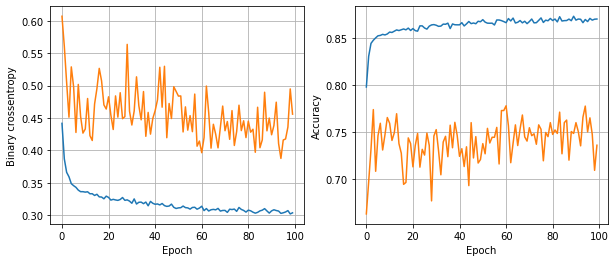

119/119 [==============================] - 0s 3ms/step - loss: 0.3083 - accuracy: 0.8749
32 nodes, dropout 0.2, lr 0.005, batch size 128


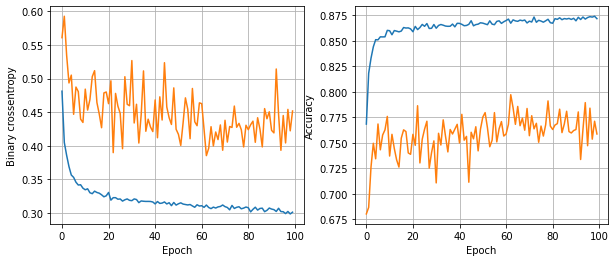

119/119 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8746
32 nodes, dropout 0.2, lr 0.001, batch size 32


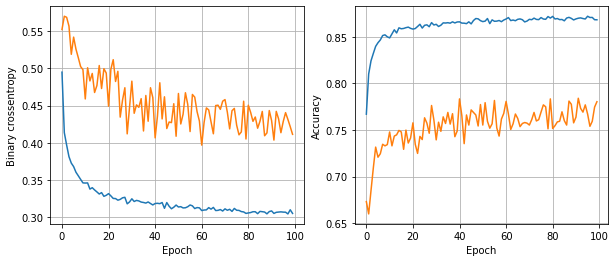

119/119 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8772
32 nodes, dropout 0.2, lr 0.001, batch size 64


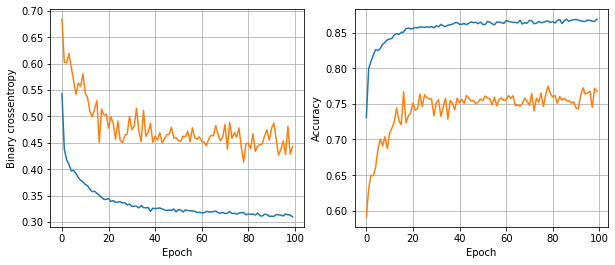

119/119 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8733
32 nodes, dropout 0.2, lr 0.001, batch size 128


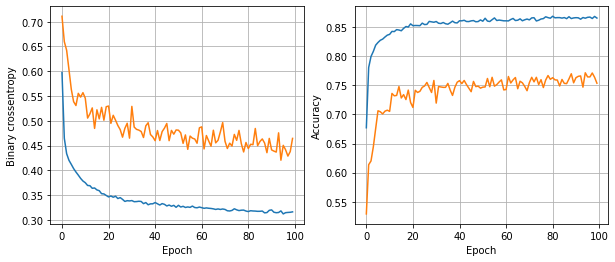

119/119 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8722
64 nodes, dropout 0, lr 0.01, batch size 32


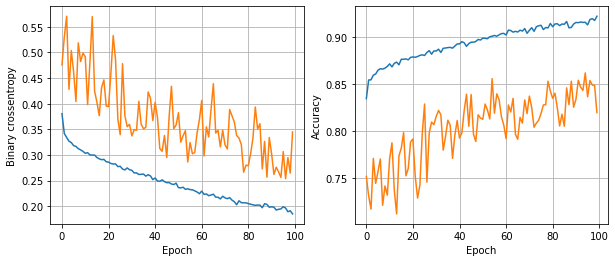

119/119 [==============================] - 0s 3ms/step - loss: 0.5754 - accuracy: 0.8554
64 nodes, dropout 0, lr 0.01, batch size 64


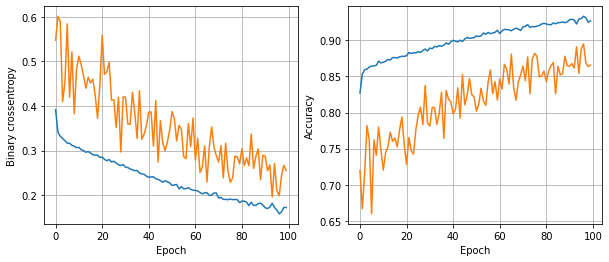

119/119 [==============================] - 0s 4ms/step - loss: 0.5813 - accuracy: 0.8628
64 nodes, dropout 0, lr 0.01, batch size 128


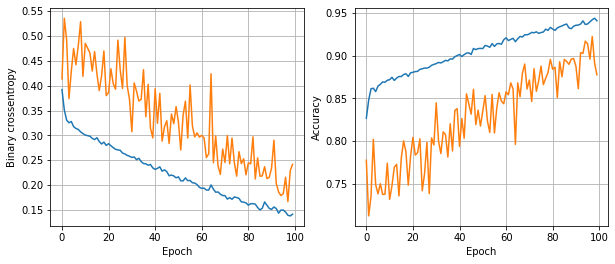

119/119 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.8528
64 nodes, dropout 0, lr 0.005, batch size 32


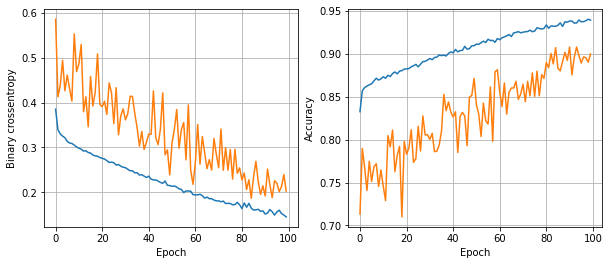

119/119 [==============================] - 0s 3ms/step - loss: 0.5716 - accuracy: 0.8473
64 nodes, dropout 0, lr 0.005, batch size 64


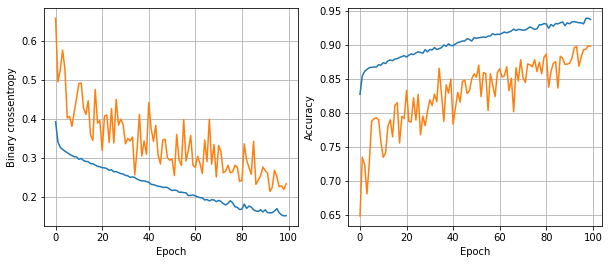

119/119 [==============================] - 0s 3ms/step - loss: 0.5327 - accuracy: 0.8562
64 nodes, dropout 0, lr 0.005, batch size 128


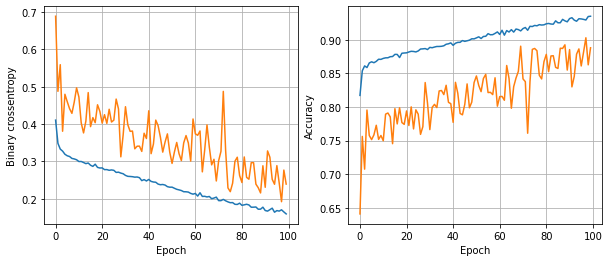

119/119 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.8567
64 nodes, dropout 0, lr 0.001, batch size 32


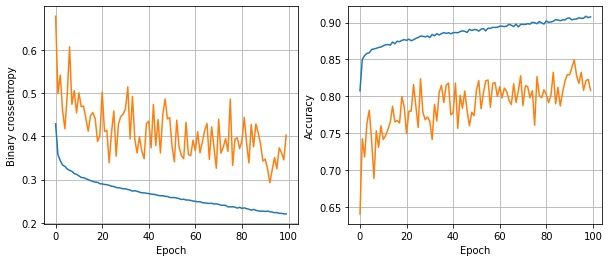

119/119 [==============================] - 0s 3ms/step - loss: 0.3507 - accuracy: 0.8644
64 nodes, dropout 0, lr 0.001, batch size 64


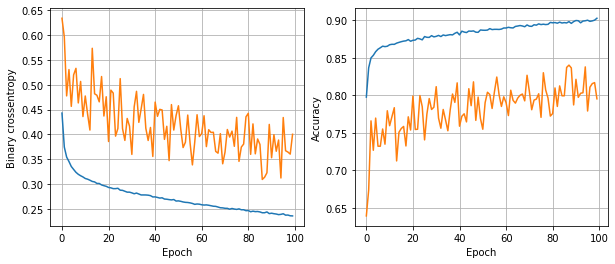

119/119 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8675
64 nodes, dropout 0, lr 0.001, batch size 128


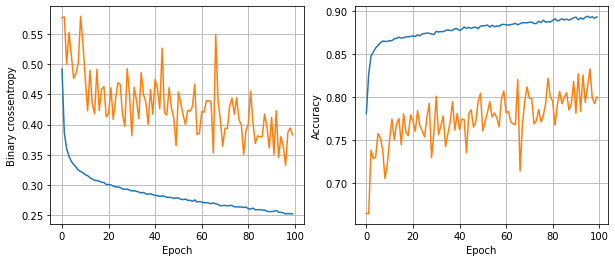

119/119 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.8791
64 nodes, dropout 0.2, lr 0.01, batch size 32


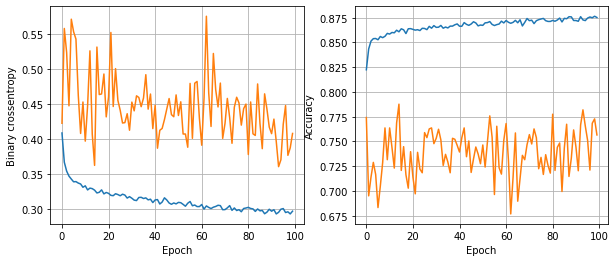

119/119 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8733
64 nodes, dropout 0.2, lr 0.01, batch size 64


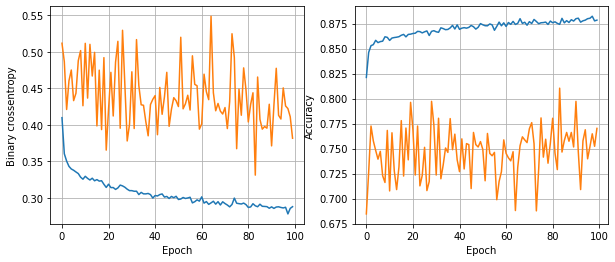

119/119 [==============================] - 0s 3ms/step - loss: 0.3166 - accuracy: 0.8780
64 nodes, dropout 0.2, lr 0.01, batch size 128


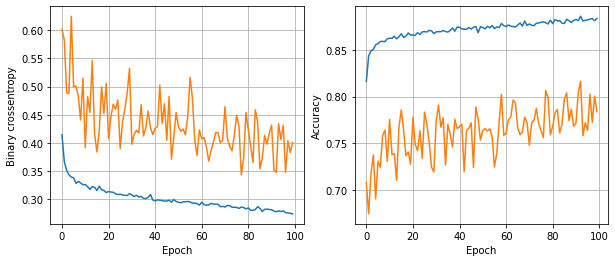

119/119 [==============================] - 0s 3ms/step - loss: 0.3236 - accuracy: 0.8762
64 nodes, dropout 0.2, lr 0.005, batch size 32


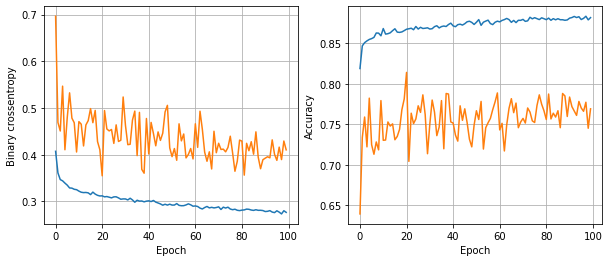

119/119 [==============================] - 0s 3ms/step - loss: 0.3191 - accuracy: 0.8707
64 nodes, dropout 0.2, lr 0.005, batch size 64


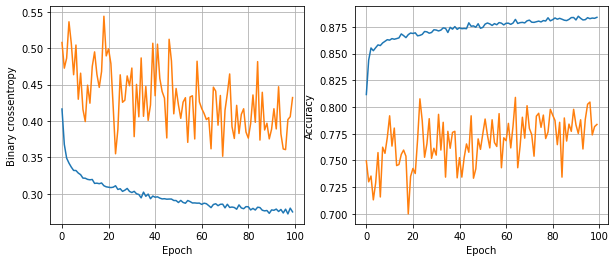

119/119 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8751
64 nodes, dropout 0.2, lr 0.005, batch size 128


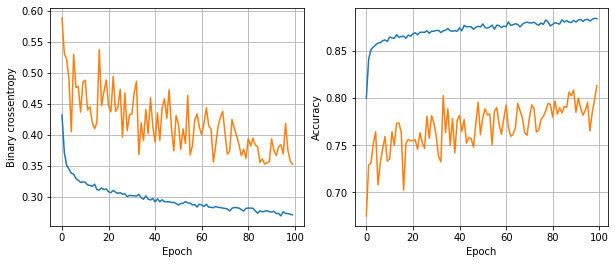

119/119 [==============================] - 0s 3ms/step - loss: 0.3148 - accuracy: 0.8725
64 nodes, dropout 0.2, lr 0.001, batch size 32


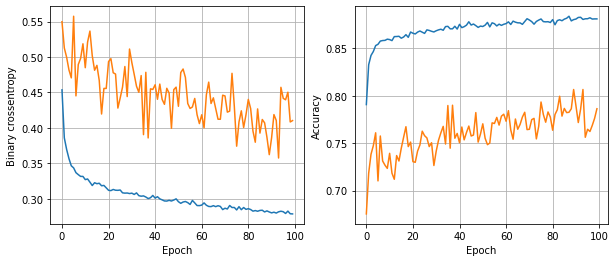

119/119 [==============================] - 0s 3ms/step - loss: 0.3045 - accuracy: 0.8749
64 nodes, dropout 0.2, lr 0.001, batch size 64


KeyboardInterrupt: ignored

In [28]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, Y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [29]:
Y_pred = least_loss_model.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(Y_test, Y_pred))

119/119 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1302
           1       0.88      0.94      0.91      2502

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

